In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../project_data/combined_crime.csv')

/var/folders/xp/08dkrc6s52j7txhyp70xzsyc0000gn/T/ipykernel_1072/397333041.py:1: DtypeWarning: Columns (0,4,5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_crime.csv')


In [3]:
nan_counts = df.isna().sum()

print("Number of NaN values for each attribute:")
print(nan_counts)

Number of NaN values for each attribute:
Crime ID                  4500699
Month                           0
Reported by                     0
Falls within                    0
Longitude                  162305
Latitude                   162305
Location                        0
LSOA code                  162305
LSOA name                  162305
Crime type                      0
Last outcome category     4698153
Context                  14131200
dtype: int64


In [4]:
df[['Year', 'Month']] = df['Month'].str.split('-', n=1, expand=True)
# print(df)

In [5]:
# Extract season from 'Month' column
def get_season(month):
#     month = int(month)
    if month in ['12', '01', '02']:
        return 'Winter'
    elif month in ['03', '04', '05']:
        return 'Spring'
    elif month in ['06', '07', '08']:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)
print(df)

                                                   Crime ID Month  \
0                                                       NaN    12   
1                                                       NaN    12   
2                                                       NaN    12   
3                                                       NaN    12   
4                                                       NaN    12   
...                                                     ...   ...   
14131352  827178f4c74110dc649c5ac8136653139a58c10f78090d...    01   
14131353  b92bceced18cc53c5fcb377f0b154e7b69b96b484c7648...    01   
14131354  acd9c90a29c22c3e4a53f1765662e4d718cb397af451c1...    01   
14131355  0a978c195f0daadccaf473f131f50f663f4340618ea802...    01   
14131356  8ddefd590ca561e28874692b8ec02db292d208439336a4...    01   

                          Reported by                 Falls within Longitude  \
0         Metropolitan Police Service  Metropolitan Police Service  0.145949   
1         M

In [6]:
df.to_csv('../project_data/crime_data_season.csv', index=False)

In [48]:
# Count the number of unique wards in the dataframe
num_unique_wards = df['LSOA name'].nunique()

# Print the result
print("Number of unique LSOA name:", num_unique_wards)

Number of unique LSOA name: 14355


    Year  Season  Count
1   2012  Spring   2773
2   2012  Summer   3391
0   2012  Autumn   3148
3   2012  Winter   2703
5   2013  Spring   2868
6   2013  Summer   3009
4   2013  Autumn   2962
7   2013  Winter   2671
9   2014  Spring   2566
10  2014  Summer   2080
8   2014  Autumn   1104
11  2014  Winter   1891
13  2015  Spring   3000
14  2015  Summer   3125
12  2015  Autumn   3013
15  2015  Winter   1076
17  2016  Spring   2737
18  2016  Summer   2688
16  2016  Autumn   2307
19  2016  Winter   2558
21  2017  Spring   1845
22  2017  Summer   1612
20  2017  Autumn    833
23  2017  Winter   1433
25  2018  Spring   1418
26  2018  Summer   1323
24  2018  Autumn   1011
27  2018  Winter    273
28  2019  Spring    197
29  2019  Winter    426


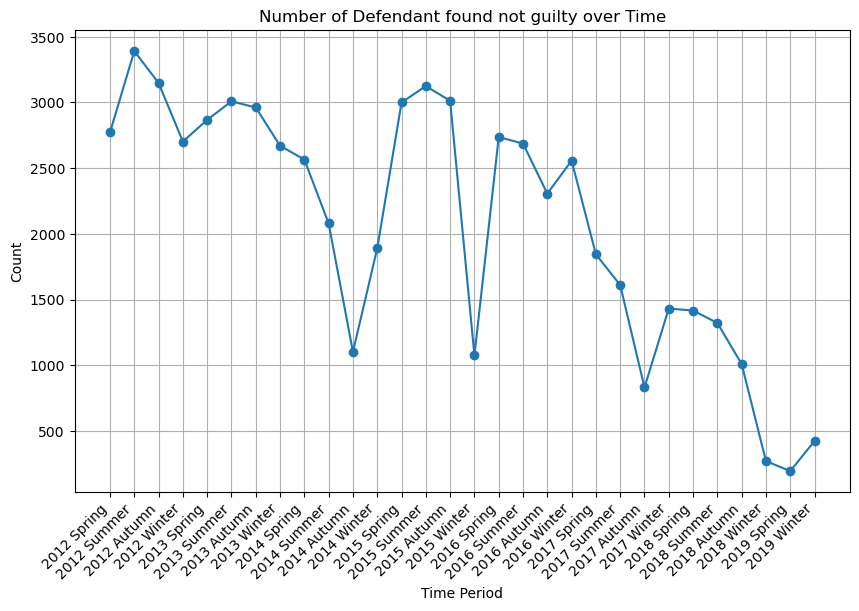

In [26]:
guilty_df = df[df['Last outcome category'] == 'Defendant found not guilty']

# Group by Year and Season, and count occurrences
grouped = guilty_df.groupby(['Year', 'Season']).size().reset_index(name='Count')
# Define the order of seasons
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Convert 'Season' column to categorical with specified order
grouped['Season'] = pd.Categorical(grouped['Season'], categories=season_order, ordered=True)

# Sort the data by 'Year' and 'Season'
sorted_grouped = grouped.sort_values(by=['Year', 'Season'])
print(sorted_grouped)

# Convert 'Year' to string type
sorted_grouped['Year'] = sorted_grouped['Year'].astype(str)

# Convert 'Season' to string type
sorted_grouped['Season'] = sorted_grouped['Season'].astype(str)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(sorted_grouped['Year'] + ' ' + sorted_grouped['Season'], sorted_grouped['Count'], marker='o', linestyle='-')

# Adding labels and title
plt.title('Number of Defendant found not guilty over Time')
plt.xlabel('Time Period')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the grid
plt.grid(True)

# Displaying the plot
plt.show()

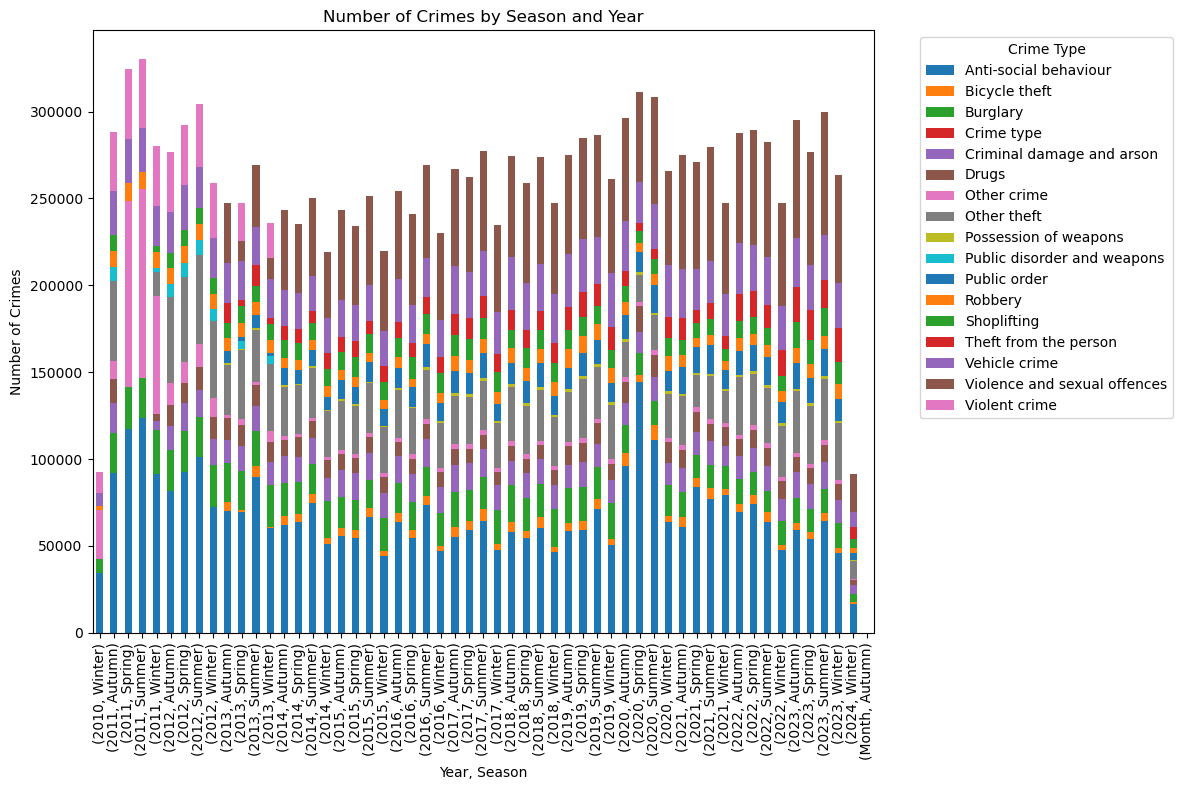

In [47]:

# Group the data by 'Year', 'Season', and 'Crime type' columns and count the occurrences
crime_counts = df.groupby(['Year', 'Season', 'Crime type']).size().unstack(fill_value=0)

# Plotting
crime_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Crimes by Season and Year')
plt.xlabel('Year, Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
# Get the unique crime types
crime_types = df['Crime type'].unique()

# Count the number of unique crime types
num_crime_types = len(crime_types)

print("Number of unique crime types:", num_crime_types)
print("Unique crime types:", crime_types)

Number of unique crime types: 17
Unique crime types: ['Anti-social behaviour' 'Burglary' 'Vehicle crime' 'Violent crime'
 'Other crime' 'Robbery' 'Crime type' 'Criminal damage and arson'
 'Other theft' 'Public disorder and weapons' 'Shoplifting' 'Drugs'
 'Theft from the person' 'Violence and sexual offences' 'Public order'
 'Bicycle theft' 'Possession of weapons']


In [27]:
df_stop_search = pd.read_csv('../project_data/combined_crime_stop_and_search.csv')

In [28]:
print(df_stop_search.head(10))

                        Type                       Date  \
0  Person and Vehicle search  2015-03-31T23:00:00+00:00   
1  Person and Vehicle search  2015-03-31T23:00:00+00:00   
2              Person search  2015-03-31T23:05:00+00:00   
3              Person search  2015-03-31T23:09:00+00:00   
4              Person search  2015-03-31T23:15:00+00:00   
5  Person and Vehicle search  2015-03-31T23:20:00+00:00   
6              Person search  2015-03-31T23:30:00+00:00   
7              Person search  2015-03-31T23:45:00+00:00   
8              Person search  2015-03-31T23:56:00+00:00   
9              Person search  2015-04-01T00:00:00+00:00   

  Part of a policing operation Policing operation Latitude Longitude Gender  \
0                          NaN                NaN      NaN       NaN   Male   
1                          NaN                NaN      NaN       NaN   Male   
2                          NaN                NaN      NaN       NaN   Male   
3                          NaN    

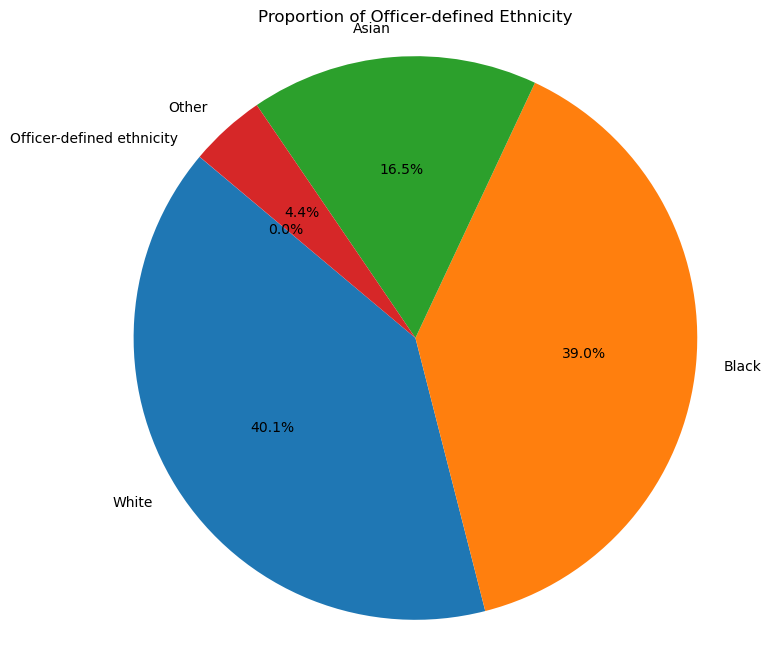

In [29]:
# Group the data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts = df_stop_search['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

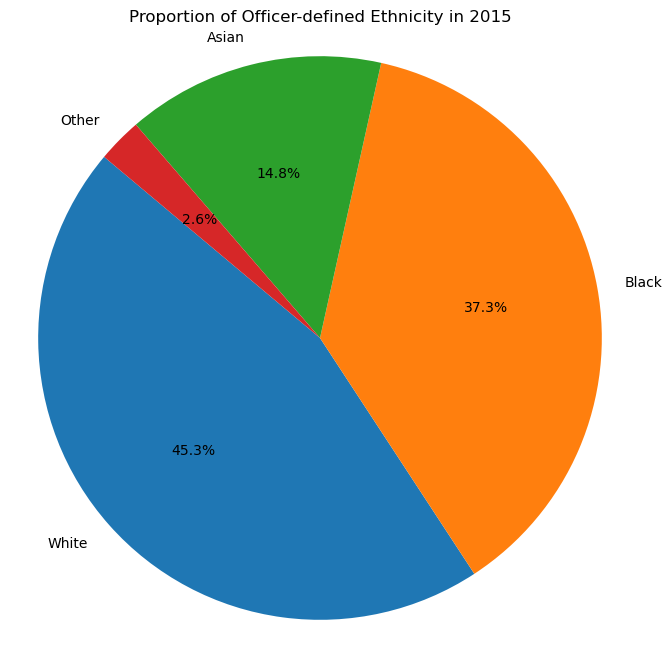

In [31]:
# Filter the DataFrame to include only data for the year 2015
df_2015 = df_stop_search[df_stop_search['Date'].str.startswith('2015')]

# Group the filtered data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts_2015 = df_2015['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts_2015, labels=ethnicity_counts_2015.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity in 2015')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

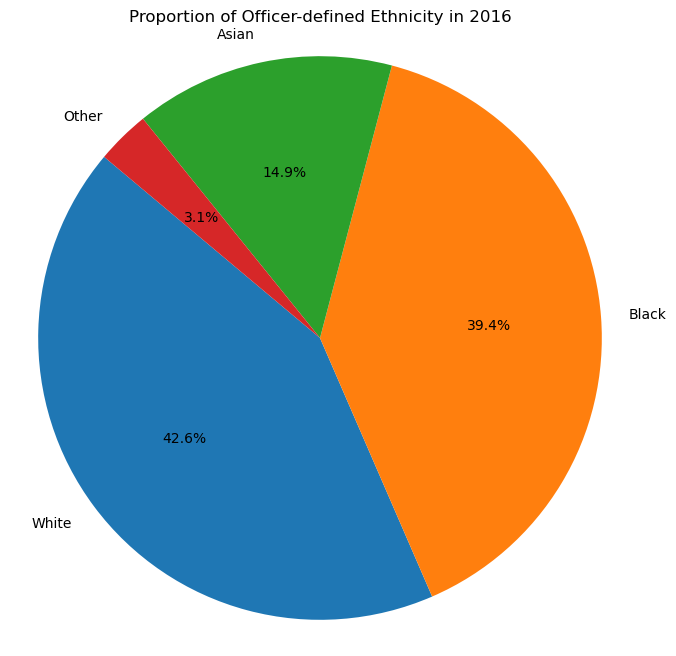

In [32]:
# Filter the DataFrame to include only data for the year 2016
df_2015 = df_stop_search[df_stop_search['Date'].str.startswith('2016')]

# Group the filtered data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts_2015 = df_2015['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts_2015, labels=ethnicity_counts_2015.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity in 2016')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

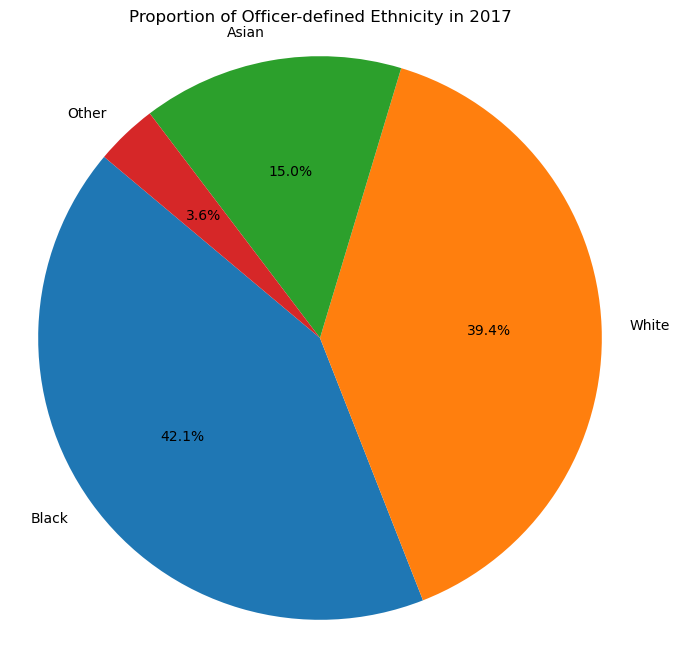

In [33]:
# Filter the DataFrame to include only data for the year 2017
df_2015 = df_stop_search[df_stop_search['Date'].str.startswith('2017')]

# Group the filtered data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts_2015 = df_2015['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts_2015, labels=ethnicity_counts_2015.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity in 2017')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

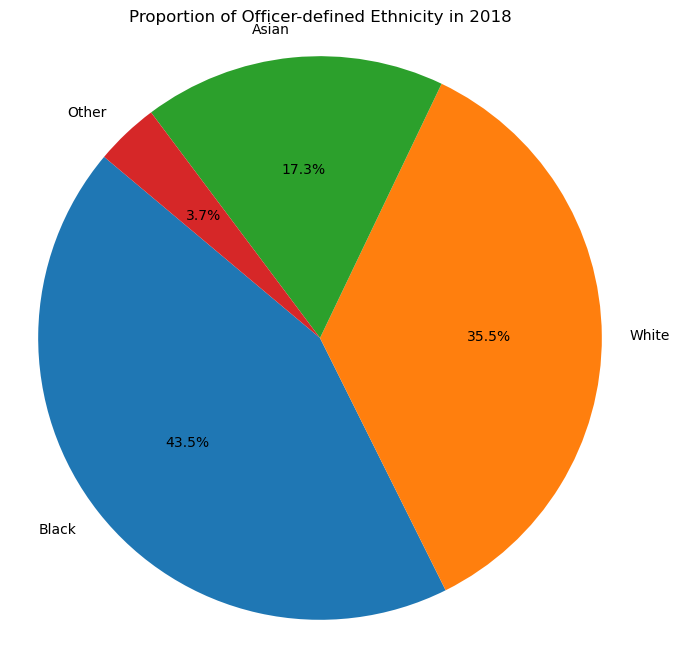

In [34]:
# Filter the DataFrame to include only data for the year 2015
df_2015 = df_stop_search[df_stop_search['Date'].str.startswith('2018')]

# Group the filtered data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts_2015 = df_2015['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts_2015, labels=ethnicity_counts_2015.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity in 2018')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

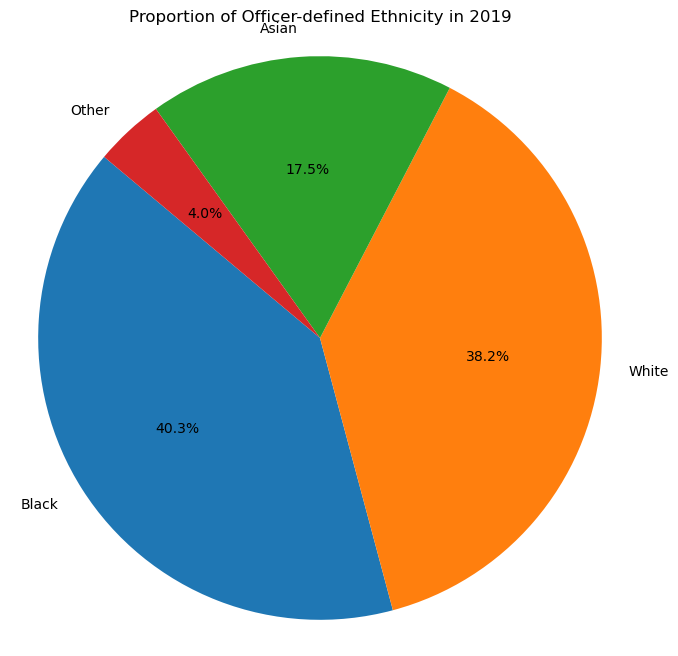

In [35]:
# Filter the DataFrame to include only data for the year 2015
df_2015 = df_stop_search[df_stop_search['Date'].str.startswith('2019')]

# Group the filtered data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts_2015 = df_2015['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts_2015, labels=ethnicity_counts_2015.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity in 2019')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

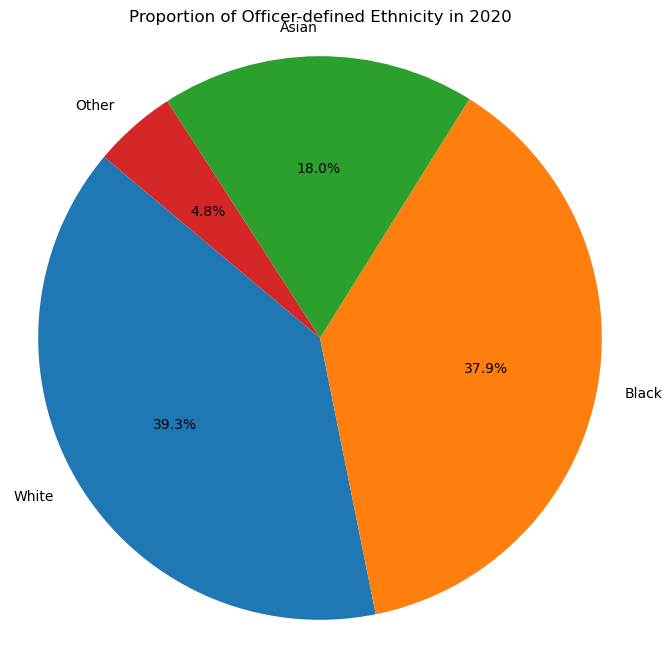

In [36]:
# Filter the DataFrame to include only data for the year 2015
df_2015 = df_stop_search[df_stop_search['Date'].str.startswith('2020')]

# Group the filtered data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts_2015 = df_2015['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts_2015, labels=ethnicity_counts_2015.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity in 2020')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

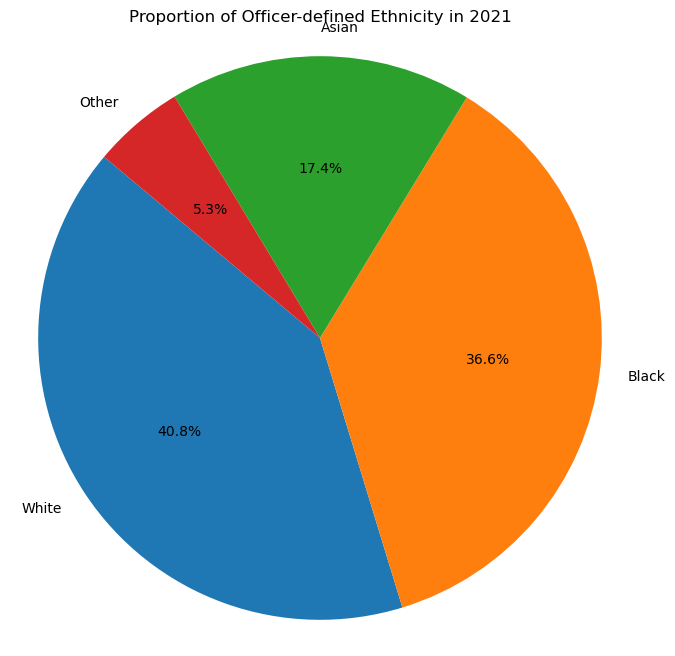

In [37]:
# Filter the DataFrame to include only data for the year 2015
df_2015 = df_stop_search[df_stop_search['Date'].str.startswith('2021')]

# Group the filtered data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts_2015 = df_2015['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts_2015, labels=ethnicity_counts_2015.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity in 2021')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

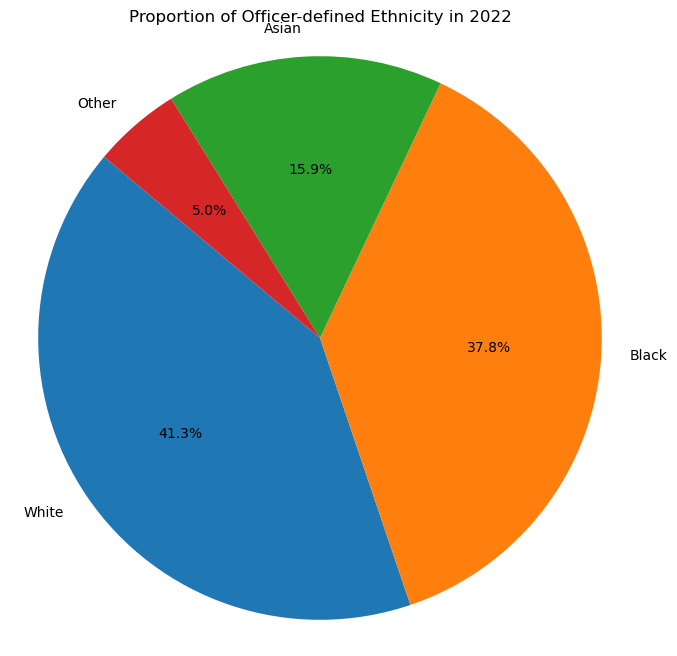

In [38]:
# Filter the DataFrame to include only data for the year 2022
df_2015 = df_stop_search[df_stop_search['Date'].str.startswith('2022')]

# Group the filtered data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts_2015 = df_2015['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts_2015, labels=ethnicity_counts_2015.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity in 2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

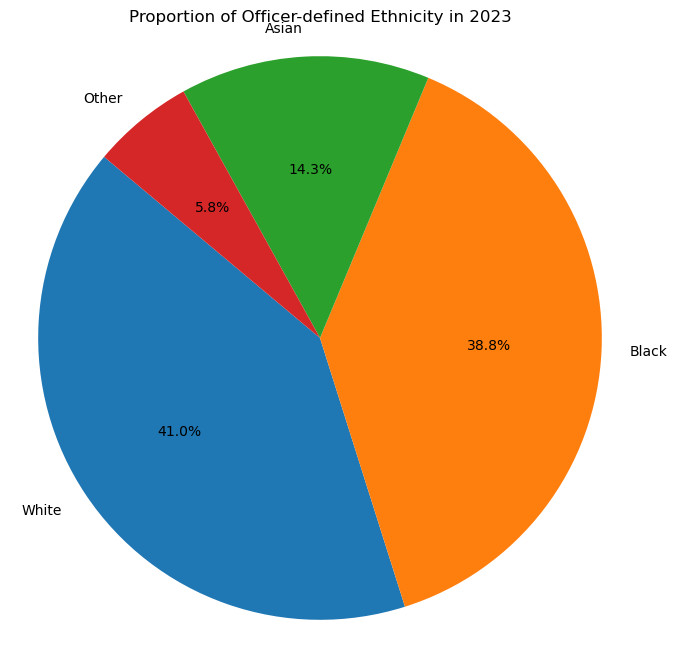

In [39]:
# Filter the DataFrame to include only data for the year 2023
df_2015 = df_stop_search[df_stop_search['Date'].str.startswith('2023')]

# Group the filtered data by 'Officer-defined ethnicity' and count occurrences
ethnicity_counts_2015 = df_2015['Officer-defined ethnicity'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts_2015, labels=ethnicity_counts_2015.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Officer-defined Ethnicity in 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [41]:
white_ethnicity_df = df_stop_search[df_stop_search['Officer-defined ethnicity'] == 'White']
black_ethnicity_df = df_stop_search[df_stop_search['Officer-defined ethnicity'] == 'Black']
asian_ethnicity_df = df_stop_search[df_stop_search['Officer-defined ethnicity'] == 'Asian']
other_ethnicity_df = df_stop_search[df_stop_search['Officer-defined ethnicity'] == 'Other']

In [42]:
nothing_found_count = white_ethnicity_df[white_ethnicity_df['Outcome'] == 'Nothing found - no further action'].shape[0]
total_rows = white_ethnicity_df.shape[0]
# Calculate the proportion
proportion_nothing_found = nothing_found_count / total_rows
print("Proportion of 'Nothing found - no further action' outcome for White ethnicity:", proportion_nothing_found)

Proportion of 'Nothing found - no further action' outcome for White ethnicity: 0.17154656996641562


In [44]:
nothing_found_count = black_ethnicity_df[black_ethnicity_df['Outcome'] == 'Nothing found - no further action'].shape[0]
total_rows = black_ethnicity_df.shape[0]
# Calculate the proportion
proportion_nothing_found = nothing_found_count / total_rows
print("Proportion of 'Nothing found - no further action' outcome for black ethnicity:", proportion_nothing_found)

Proportion of 'Nothing found - no further action' outcome for black ethnicity: 0.16824768239243362


In [45]:
nothing_found_count = asian_ethnicity_df[asian_ethnicity_df['Outcome'] == 'Nothing found - no further action'].shape[0]
total_rows = asian_ethnicity_df.shape[0]
# Calculate the proportion
proportion_nothing_found = nothing_found_count / total_rows
print("Proportion of 'Nothing found - no further action' outcome for asian ethnicity:", proportion_nothing_found)

Proportion of 'Nothing found - no further action' outcome for asian ethnicity: 0.14984737767089076


In [46]:
nothing_found_count = other_ethnicity_df[other_ethnicity_df['Outcome'] == 'Nothing found - no further action'].shape[0]
total_rows = other_ethnicity_df.shape[0]
# Calculate the proportion
proportion_nothing_found = nothing_found_count / total_rows
print("Proportion of 'Nothing found - no further action' outcome for other ethnicity:", proportion_nothing_found)

Proportion of 'Nothing found - no further action' outcome for other ethnicity: 0.1166696969273157


In [11]:
df_outcome = pd.read_csv('../project_data/combined_crime_outcomes.csv')

/var/folders/xp/08dkrc6s52j7txhyp70xzsyc0000gn/T/ipykernel_87420/1630903671.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_outcome = pd.read_csv('combined_crime_outcomes.csv')


In [12]:
print(df_outcome.head(5))

                                            Crime ID    Month  \
0  ed3862ab34dbb57b6ed9b4fd2a526ac8a2b792a3dec5c9...  2012-01   
1  6d83255ed1eab6d573864fce0e1487a22ca3c575dc6cfc...  2012-01   
2  d0d08cd67c190fe68e80971589e09cac8dfb6b043683a1...  2012-01   
3  4d9f905d34c8058c5b6ff72bfad3dd594b67f747d171dd...  2012-01   
4  25af708d8661a8abc1a199048d1a62cf0aa6ef7e2f8b34...  2012-01   

                   Reported by                 Falls within  Longitude  \
0  Metropolitan Police Service  Metropolitan Police Service  -0.261808   
1  Metropolitan Police Service  Metropolitan Police Service  -0.260767   
2  Metropolitan Police Service  Metropolitan Police Service   0.052433   
3  Metropolitan Police Service  Metropolitan Police Service   0.010641   
4  Metropolitan Police Service  Metropolitan Police Service  -0.305015   

    Latitude                     Location  LSOA code  \
0  51.543804     On or near MELVILLE ROAD  E01033456   
1  51.540461  On or near SHAKESPEARE ROAD  E01000599

In [13]:
outcome_types = df_outcome['Outcome type'].unique()
print(outcome_types)

['Offender fined' 'Offender given conditional discharge'
 'Offender given community sentence' 'Offender sent to prison'
 'Offender given suspended prison sentence'
 'Offender otherwise dealt with' 'Court case unable to proceed'
 'Defendant found not guilty' 'Offender ordered to pay compensation'
 'Offender deprived of property' 'Offender given absolute discharge'
 'Outcome type' 'Defendant sent to Crown Court'
 'Investigation complete; no suspect identified' 'Suspect charged'
 'Offender given a drugs possession warning' 'Offender given a caution'
 'Offender given penalty notice' 'Local resolution'
 'Suspect charged as part of another case' 'Unable to prosecute suspect'
 'Formal action is not in the public interest']


In [30]:
df_outcome[['Year', 'Month']] = df_outcome['Month'].str.split('-', n=1, expand=True)
print(df_outcome)

                                                  Crime ID Month  \
0        ed3862ab34dbb57b6ed9b4fd2a526ac8a2b792a3dec5c9...    01   
1        6d83255ed1eab6d573864fce0e1487a22ca3c575dc6cfc...    01   
2        d0d08cd67c190fe68e80971589e09cac8dfb6b043683a1...    01   
3        4d9f905d34c8058c5b6ff72bfad3dd594b67f747d171dd...    01   
4        25af708d8661a8abc1a199048d1a62cf0aa6ef7e2f8b34...    01   
...                                                    ...   ...   
7804509  13cb7accfc6a4720a6bd3c3575700316923e660e50b843...    01   
7804510  53ac09d5d95b9d107cf3c29946a1b3d2c6ed3571156495...    01   
7804511  2c921d53b77d9ae322c5abcf6b565b175125d11c73afdb...    01   
7804512  25d73b1215921f8f570fa5cfb25afe006163411b23fc0f...    01   
7804513  8f733982131cd11b1a6e4d93d9a6a4e66d695bfd3d68c2...    01   

                         Reported by                 Falls within  Longitude  \
0        Metropolitan Police Service  Metropolitan Police Service  -0.261808   
1        Metropolitan P